In [482]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud

In [483]:
pd.set_option('display.max_columns', None)
df_london = pd.read_csv(r"C:\Users\nicol\OneDrive\Master\Goldsmiths\Thesis\weather-prediction\data\london_weather_2014-2024.csv")

In [484]:
#sort index
df_london = df_london.sort_index()
columns_to_drop = ['Unnamed: 0']
df_london = df_london.drop(columns=columns_to_drop)

## Descriptive statistics and EDA

In [485]:
df_london.shape

(3793, 33)

In [486]:
df_london.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [487]:
df_london['datetime'].min()

'2014-01-01'

In [488]:
df_london['datetime'].max()

'2024-05-20'

In [489]:
df_london['temp'].min()

-3.2

In [490]:
df_london['temp'].max()

30.3

In [491]:
df_london.dtypes

name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

In [492]:
df_london.isna().sum()

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1426
snow                   0
snowdepth              0
windgust             175
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2931
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

In [493]:
print(df_london.describe())

           tempmax      tempmin         temp  feelslikemax  feelslikemin  \
count  3793.000000  3793.000000  3793.000000   3793.000000   3793.000000   
mean     15.809122     8.918007    12.265225     15.406248      7.705088   
std       6.269174     4.919809     5.349231      6.822375      5.983355   
min      -1.200000    -4.500000    -3.200000     -5.500000    -10.800000   
25%      11.100000     5.200000     8.200000     11.100000      2.900000   
50%      15.300000     9.000000    12.000000     15.300000      7.300000   
75%      20.500000    12.700000    16.500000     20.500000     12.700000   
max      39.800000    22.100000    30.300000     38.200000     22.100000   

         feelslike          dew     humidity       precip   precipprob  \
count  3793.000000  3793.000000  3793.000000  3793.000000  3793.000000   
mean     11.457843     7.456051    74.398497     1.635440    59.056156   
std       6.232755     4.594663    10.471082     3.881607    49.179505   
min      -8.500000 

In [494]:
print(df_london.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3793 entries, 0 to 3792
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3793 non-null   object 
 1   datetime          3793 non-null   object 
 2   tempmax           3793 non-null   float64
 3   tempmin           3793 non-null   float64
 4   temp              3793 non-null   float64
 5   feelslikemax      3793 non-null   float64
 6   feelslikemin      3793 non-null   float64
 7   feelslike         3793 non-null   float64
 8   dew               3793 non-null   float64
 9   humidity          3793 non-null   float64
 10  precip            3793 non-null   float64
 11  precipprob        3793 non-null   int64  
 12  precipcover       3793 non-null   float64
 13  preciptype        2367 non-null   object 
 14  snow              3793 non-null   float64
 15  snowdepth         3793 non-null   float64
 16  windgust          3618 non-null   float64


In [495]:
print(df_london.isnull().sum())

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1426
snow                   0
snowdepth              0
windgust             175
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2931
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64


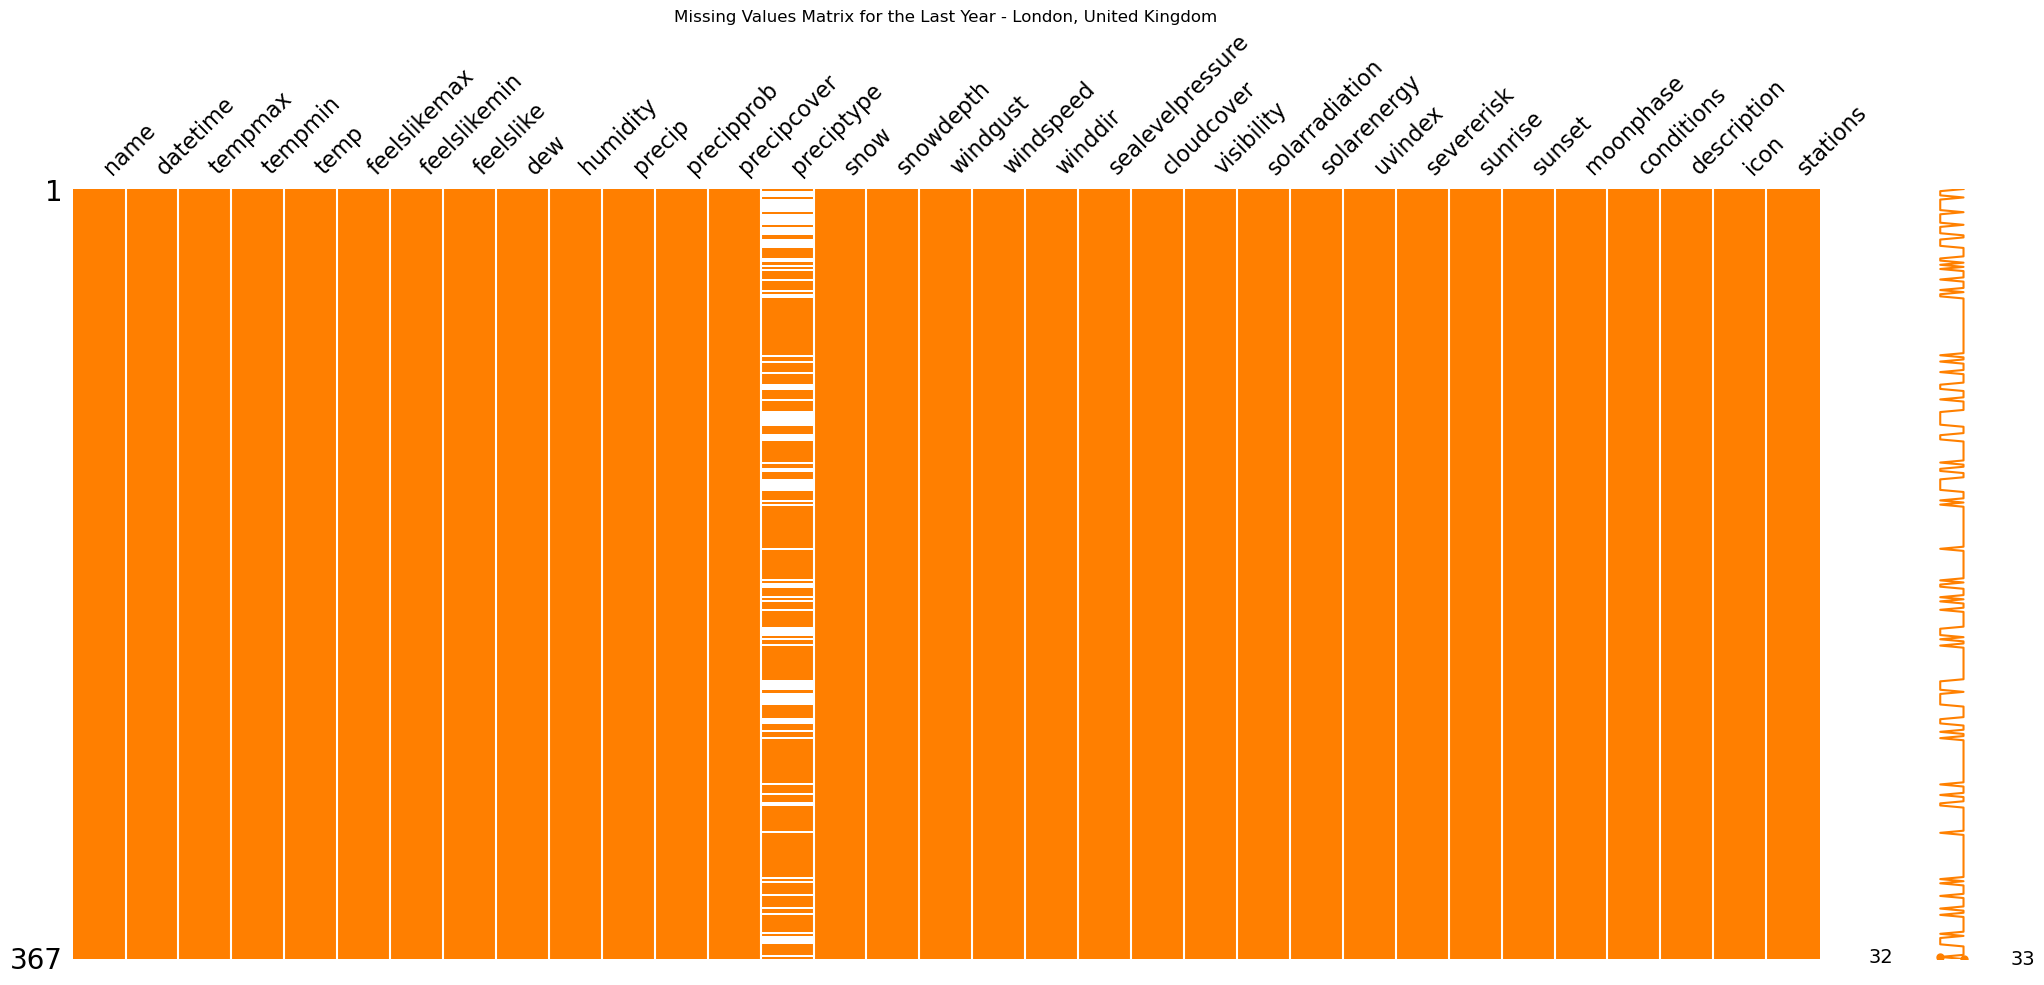

In [496]:
df_london['datetime'] = pd.to_datetime(df_london['datetime'])

last_year = df_london['datetime'].max() - pd.DateOffset(years=1)
df_last_year = df_london[df_london['datetime'] >= last_year]

msno.matrix(df_last_year, color=(1.0, 0.5, 0.0))
plt.title('Missing Values Matrix for the Last Year - London, United Kingdom')
plt.show()

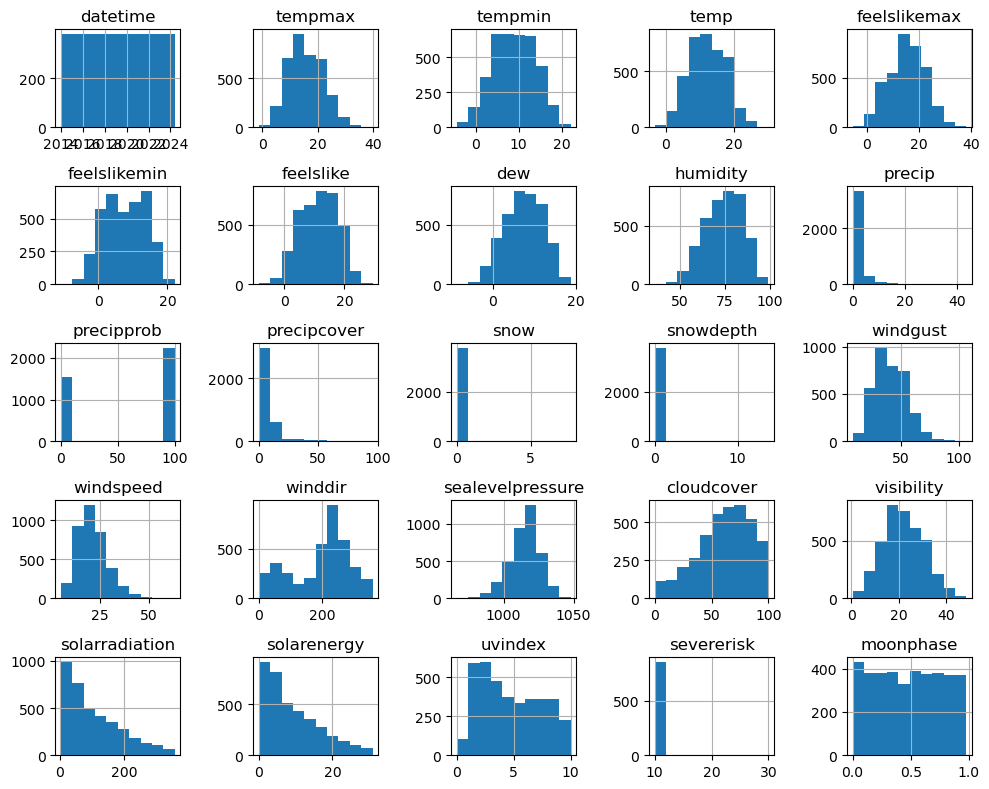

In [497]:
df_london.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

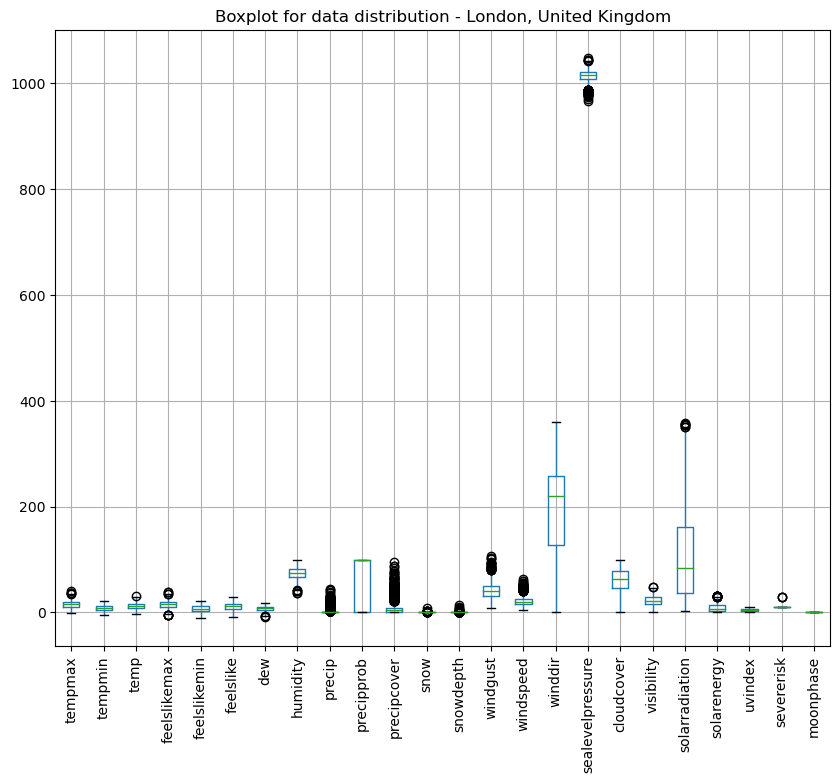

In [498]:
df_london.boxplot(figsize=(10, 8))
plt.xticks(rotation=90)
plt.title('Boxplot for data distribution - London, United Kingdom')
plt.show()

In [499]:
corr_matrix = df_london.corr()
print(corr_matrix) 

                   tempmax   tempmin      temp  feelslikemax  feelslikemin  \
tempmax           1.000000  0.880739  0.973772      0.992570      0.892497   
tempmin           0.880739  1.000000  0.956810      0.882454      0.984158   
temp              0.973772  0.956810  1.000000      0.970469      0.957931   
feelslikemax      0.992570  0.882454  0.970469      1.000000      0.897502   
feelslikemin      0.892497  0.984158  0.957931      0.897502      1.000000   
feelslike         0.966945  0.950490  0.992946      0.972603      0.965720   
dew               0.815229  0.919002  0.888771      0.826023      0.920149   
humidity         -0.510786 -0.295188 -0.433604     -0.484854     -0.290831   
precip           -0.079772  0.028707 -0.037742     -0.072548      0.004912   
precipprob       -0.235622 -0.062457 -0.167136     -0.222448     -0.089557   
precipcover      -0.163003 -0.025887 -0.107080     -0.148046     -0.054078   
snow             -0.115714 -0.108447 -0.118596     -0.124238    

C:\Users\nicol\AppData\Local\Temp\ipykernel_6008\1328646219.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_london.corr()


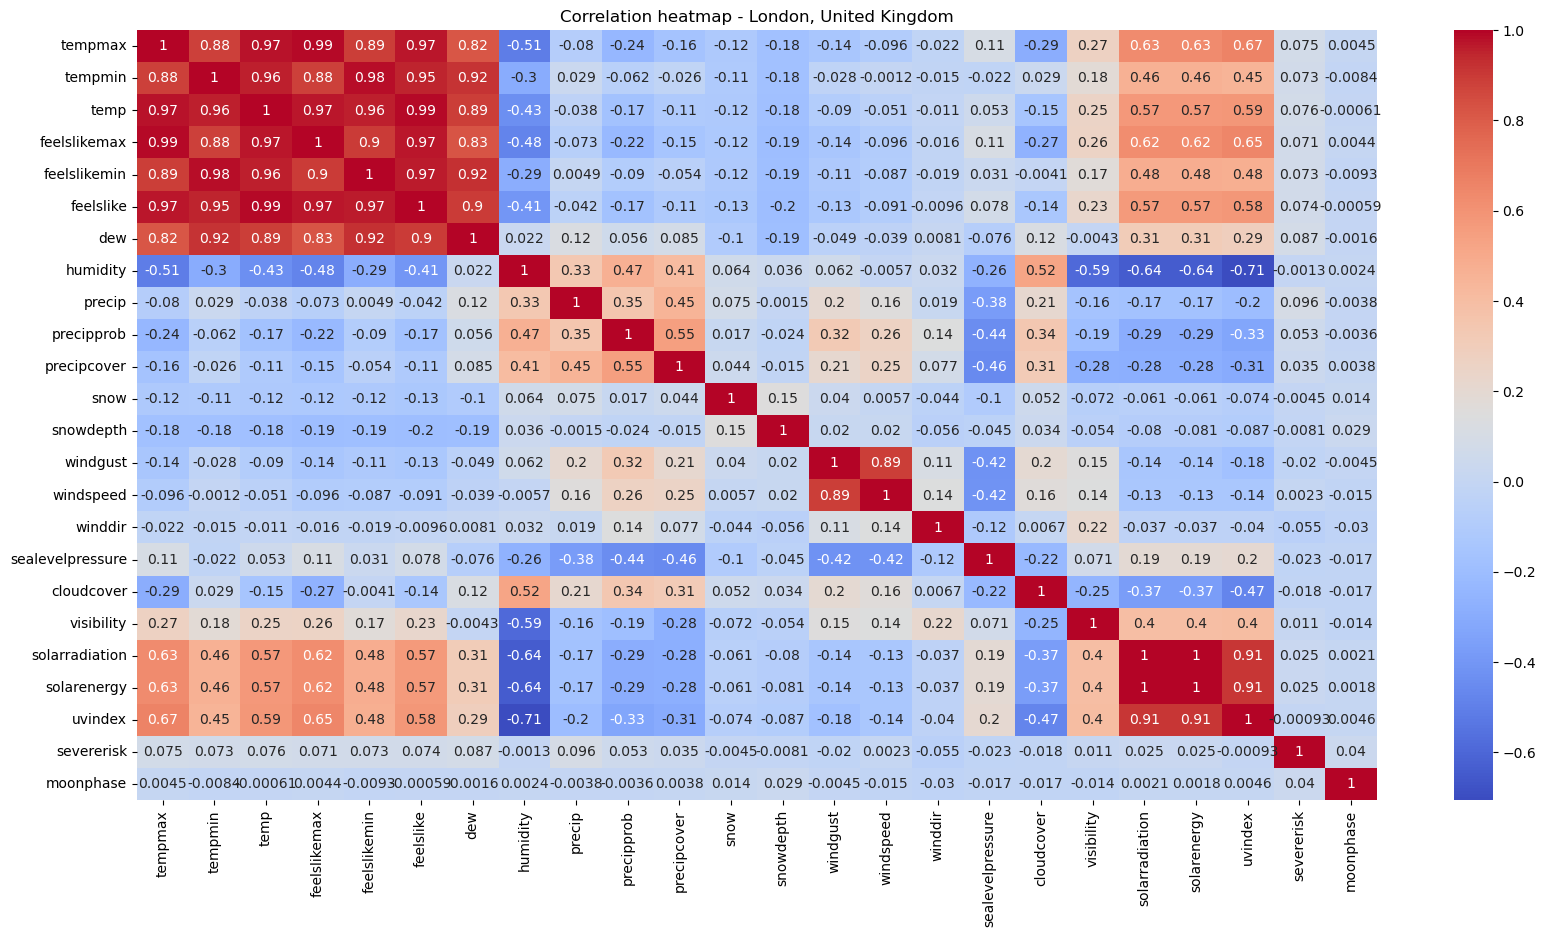

In [500]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation heatmap - London, United Kingdom")
plt.show()

look into the correlation that humidity has with temp (-0.43) + solarradiation, solarenergy or uvindex
look into multicolinearity - multiple feature that are roughly the same as the target, which need to be removed (first 5 after the first one)

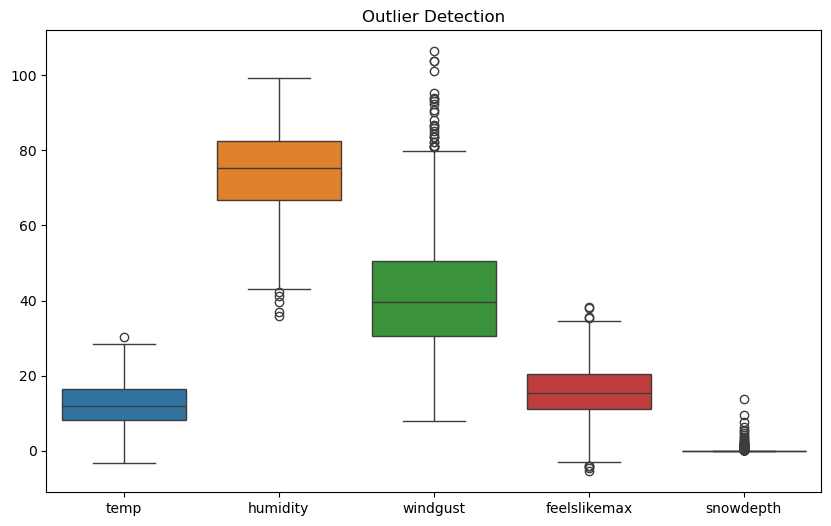

In [501]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_london[['temp', 'humidity', 'windgust', 'feelslikemax', 'snowdepth']])
plt.title("Outlier Detection")
plt.show()

In [502]:
# look into how each of these are measured 
# for example temp is the average at 18 
#first run the models with outliers and then see the results 

## Missing values

In [503]:
df_london.isna().sum()

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1426
snow                   0
snowdepth              0
windgust             175
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2931
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

In [504]:
#run k-nn to fill in the missing values with the k nearest neighbour 
#https://www.sciencedirect.com/science/article/abs/pii/S0164121212001586#:~:text=kNN%20imputation%20is%20designed%20to,or%20attribute)%20is%20categorical%2C%20referred

imputer = KNNImputer(n_neighbors=5)
df_london[['windgust', 'severerisk']] = imputer.fit_transform(df_london[['windgust', 'severerisk']])

In [505]:
df_london['preciptype'].unique()

array(['rain', nan, 'rain,snow', 'snow'], dtype=object)

In [506]:
df_london['preciptype'].value_counts()

rain         2320
rain,snow      40
snow            7
Name: preciptype, dtype: int64

In [507]:
df_london.isna().sum()

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1426
snow                   0
snowdepth              0
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk             0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

In [508]:
#filling in missing values from precipitation because if they are missing, it means there was no registration of precipitation that day
df_london['preciptype'] = df_london['preciptype'].fillna(0)

In [509]:
df_london.isna().sum()

name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
dtype: int64

## Droppping unnecessary columns

In [510]:
# based on the heatmap, it seems that columns like tempmax, tempin, feelslikemax, feelslikemin and feelslike are too similar with the target variable and they are being dropped as to not create any data leakage in the models to follow

In [511]:
# reference multi colinearity

In [512]:
columns_to_drop = ['tempmax', 'tempmin', 'icon', 'stations', 'conditions', 'tempmin', 'feelslikemax', 'feelslikemin', 'feelslike']
df_london = df_london.drop(columns=columns_to_drop)

## Tokenization of the "description" column

In [513]:
# step 1: text processing
tokenizer = CountVectorizer()
hashingTF = TfidfTransformer(use_idf=False)
idf = TfidfTransformer(use_idf=True)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)

In [514]:
# pipeline that processes text and then clusters
pipeline = Pipeline(steps=[
    ('tokenizer', tokenizer),
    ('hashingTF', hashingTF),
    ('idf', idf),
    ('kmeans', kmeans)
])

In [515]:
# fitting the model on the "description"column
text_features = pipeline.fit_transform(df_london['description'])

C:\Users\nicol\anaconda3\envs\AI2023\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [516]:
kmeans.labels_
df_london['clusters_description'] = kmeans.labels_

In [517]:
df_london['clusters_description'].value_counts()

0    2309
1    1244
2     240
Name: clusters_description, dtype: int64

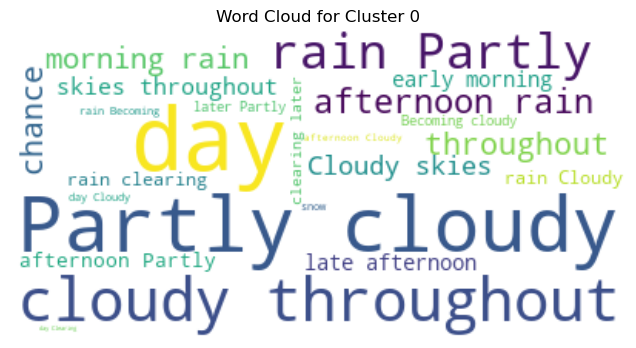

In [518]:
text = ' '.join(description for description in df_london[df_london['clusters_description']==0]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 0')
plt.show()

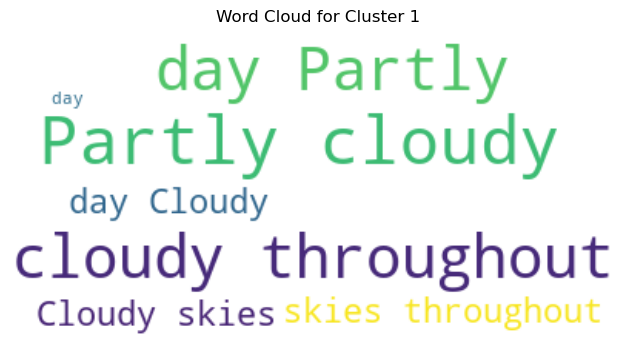

In [519]:
text = ' '.join(description for description in df_london[df_london['clusters_description']==1]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 1')
plt.show()

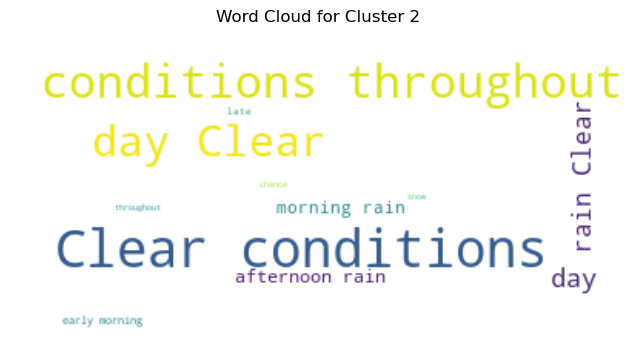

In [520]:
text = ' '.join(description for description in df_london[df_london['clusters_description']==2]['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 2')
plt.show()

In [521]:
df_london = df_london.drop(columns=['description'])
df_london.head(2)

,name,datetime,temp,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,clusters_description
0,"London, England, United Kingdom",2014-01-01,9.1,6.7,84.8,11.857,100,16.67,rain,0.0,0.0,72.4,38.4,190.5,993.1,67.4,14.2,6.9,0.5,0,10.0,2014-01-01T08:06:14,2014-01-01T16:02:04,0.00,0
1,"London, England, United Kingdom",2014-01-02,9.1,6.0,81.0,5.394,100,12.50,rain,0.0,0.0,51.8,29.8,216.2,993.4,47.4,26.7,38.3,3.3,2,10.0,2014-01-02T08:06:07,2014-01-02T16:03:08,0.03,0


## Download of updated dataframe

In [522]:
# folder_path = r'C:\Users\nicol\OneDrive\Master\Goldsmiths\Thesis\weather-prediction\data'
# file_name = 'london_weather_2014-2024_updated.csv'
# full_path = os.path.join(folder_path, file_name)

# # save the DataFrame to the specified path
# df_london.to_csv(full_path)